# Estimate rates: Erdos-Renyi

In [7]:
import numpy as np
import matplotlib.pylab as plt
import random
from scipy.special import comb

import sys
sys.path.append('../src/')
sys.path.append('../scripts/')

from higher_order_structures import ErdosRenyiSC
from simulate_gillespie import *
from estimate_total_rates import *

from higher_order_generators import get_p1_p2_for_target_degrees_precise

from utils import save_hypergraph, load_hypergraph

## Setup

In [2]:
# d1_d2_list = [(20, 6), (11, 2), (10, 2), (10, 1), (9, 2), (12, 2), (14, 2), (16, 3)]
# for d1, d2 in d1_d2_list:
#     p_G, p_Delta = get_p1_p2_for_target_degrees_precise(d1, d2, N)
#     print(f"{d1, d2}: \t {p_G > np.log(N)/N}")

In [3]:
N = 1000
d1, d2 = (16, 3)
g = ErdosRenyiSC(N, d1, d2)

In [4]:
g.print()
g.summary()

	Erdos-Renyi-SC on 1000 nodes with 9141 edges.

	Target d1: 16.00, Realized d1: 16.21
	Target d2: 3.00, Realized d2: 3.10

	Target p1:  0.01601602, Realized p1: 0.01623023
	Target p2:  0.00000602, Realized p2: 0.00000622

	Initial p_G used for G(N, p_G): 0.01008840

	Realized number of pw edges:  8107/499500
	Realized number of ho edges:  1034/166167000

	Is valid SC: True




In [ ]:
# file_path = "../results/random_ER.pkl"
# save_hypergraph(g, file_path)

In [29]:
print("Some basic stats:\n")
pw_degrees = [len(g.neighbors(i, 1)) for i in range(g.N)]
ho_degrees = [len(g.neighbors(i, 2)) for i in range(g.N)]

print(f"Mean (SD) PW: {np.mean(pw_degrees):.2f}, ({np.std(pw_degrees):.2f})")
print(f"Mean (SD) HO: {np.mean(ho_degrees):.2f}, ({np.std(ho_degrees):.2f})\n")

print(f"CV (SD / Mean) PW: {np.std(pw_degrees) / np.mean(pw_degrees):.2f}")
print(f"CV (SD / Mean) HO: {np.std(ho_degrees) / np.mean(ho_degrees):.2f}")

# 2nd moments (E[X^2] = Var(X) + E[X]^2) around 200?
realized_mean_pw = np.mean(pw_degrees)
realized_mean_ho = np.mean(ho_degrees)

realized_var_pw = np.var(pw_degrees)
realized_var_ho = np.var(ho_degrees)

realized_2nd_moment_pw = realized_var_pw + np.pow(realized_mean_pw, 2)
realized_2nd_moment_ho = realized_var_ho + np.pow(realized_mean_ho, 2)

print(f"Mean (Var) PW: {realized_mean_pw:.2f} ({realized_var_pw:.2f})")
print(f"Mean (Var) HO: {realized_mean_ho:.2f} ({realized_var_ho:.2f})\n")

print(f"2nd moment PW: {realized_2nd_moment_pw:.2f}")
print(f"2nd moment HO: {realized_2nd_moment_ho:.2f}\n")

print(f"Min, Max PW: {np.min(pw_degrees):.0f}, {np.max(pw_degrees):.0f}")
print(f"Min, Max HO: {np.min(ho_degrees):.0f}, {np.max(ho_degrees):.0f}")

Some basic stats:

Mean (SD) PW: 16.21, (4.65)
Mean (SD) HO: 3.10, (1.70)

CV (SD / Mean) PW: 0.29
CV (SD / Mean) HO: 0.55
Mean (Var) PW: 16.21 (21.66)
Mean (Var) HO: 3.10 (2.90)

2nd moment PW: 284.55
2nd moment HO: 12.52

Min, Max PW: 3, 32
Min, Max HO: 0, 9


In [29]:
test_name = "random_ER"

I0 = 50
nsims = 100

run_gillespie_simulations = True
time_max = 10

In [30]:
# TODO: set beta1, beta2 such that k^* = .75 N
mu    = 1    # recovery rate

# TODO: 
# Try with 
# lambda_1 \in [1, 1.3, 1.5]
# lambda_2 \in [2, 5]
lambda1 = 1.6 # <- increase lambda
lambda2 = 4

beta1 = lambda1 * mu / d1 # pairwise infection rate
beta2 = lambda2 * mu / d2 # hyperedge contagion rate

beta1, beta2

(0.1, 1.3333333333333333)

In [31]:
print(f"{test_name}: \n")
print(f"\tH = {g.name}, N = {N}, (d1, d2) = {(d1, d2)}, I0 = {I0}, time_max = {time_max},")
g.print()

print(f"\tbeta1 = {beta1:.4f}, beta2 = {beta2:.4f}")
print(f"\twith estimation based on {nsims} Gillespie simulation runs\n")

random_ER: 

	H = Erdos-Renyi-SC, N = 1000, (d1, d2) = (16, 3), I0 = 50, time_max = 10,
	Erdos-Renyi-SC on 1000 nodes with 8999 edges.

	beta1 = 0.1000, beta2 = 1.3333
	with estimation based on 100 Gillespie simulation runs



## Run Gillespie

exited on time=10.00028518739448, waiting_time=0.00032748378684194733
exited on time=10.000669065609367, waiting_time=0.0009602219607596289
exited on time=10.000549681536683, waiting_time=0.0006650063791049487
exited on time=10.000127551378457, waiting_time=0.0014866001168753636
exited on time=10.000970349844115, waiting_time=0.0010224481709985814
exited on time=10.000398745986937, waiting_time=0.0011034894873689866
exited on time=10.000274016280267, waiting_time=0.0017699156541453969
exited on time=10.000369881699173, waiting_time=0.0017296512766833236
exited on time=10.000094467985244, waiting_time=0.0013038059711310704
exited on time=10.000890722442454, waiting_time=0.001125733737098734
exited on time=10.001139025672986, waiting_time=0.0014477378249801145
exited on time=10.000001175961698, waiting_time=9.666733415863008e-05
exited on time=10.000811509045343, waiting_time=0.0012132189751929074
exited on time=10.000324749153686, waiting_time=0.0007551112716341524
exited on time=10.000

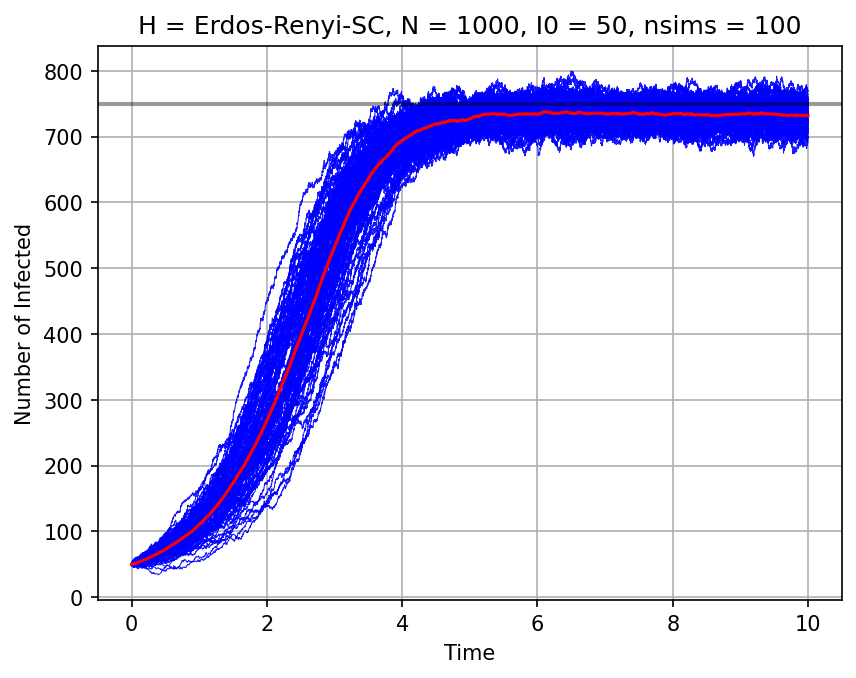

In [32]:
## --- Run Gillespie ---
run_gillespie_simulations = True

I0_gillespie = I0 # TODO: go over the range when necessary
nodes = list(g.nodes.keys())
initial_infections = random.sample(nodes, I0)

if run_gillespie_simulations: 
    X_sims = []
    for _ in range(nsims):
        X_t = gillespie_sim(g, beta1, beta2, mu, initial_infections, time_max)
        X_sims.append(X_t)

    # save the simulation results
    sim_results = {f'sim_{i}': X_sims[i] for i in range(nsims)}
    np.savez_compressed(f'../results/gillespie-sims_{test_name}_I0={I0}.npz', **sim_results)
else: 
    # load simulation results
    sim_results = np.load(f'../results/gillespie-sims_{test_name}_I0={I0}.npz', allow_pickle=True)
    X_sims = [sim_results[f'sim_{i}'] for i in range(nsims)]

# plot X_t curves in gray and average curve in red
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

avg_curve, times = get_average(X_sims, time_max, nsims, delta_t = 0.01)
plt.plot(times, avg_curve, "red")

plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, I0 = {I0}, nsims = {nsims}")
plt.savefig(f"../figures/estimation/{test_name}/gillespie-sims-I0=10.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig) # free up memory

## Solve KEs and compare

In [34]:
# solve KEs and compare
all_states = list(range(N + 1))
M = len(all_states)
ode_system_random = list_all_ODEs_random(g, beta1, beta2, mu, g.p1_realized, g.p2_realized)

# set the initial condition
p0 = np.zeros(M)
i_set0 = all_states.index(I0)
p0[i_set0] = 1.0 # all other states have prob 0 at time 0
# p0

In [35]:
# solve ode_system_random over time
t_span = (0.0, time_max)

# times t_i to evaluate in, get saved in sol.t
steps_eval = 202
t_eval = np.linspace(t_span[0], t_span[1], steps_eval)

def f_ode(t, p):
    return ode_system_random(t, p)

sol = solve_ivp(f_ode, 
                t_span, 
                p0, 
                t_eval=t_eval,
                method="LSODA")

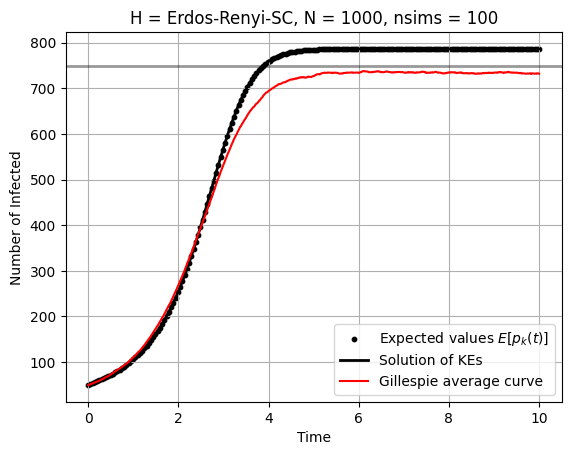

In [36]:
# plot both the expected values of p_{k}(t) 
# and the Gillespie average curve
# on the same figure

expected_values = calculate_expected_values(sol)

plt.figure()
plt.scatter(sol.t, expected_values, s = 10, color="k", 
            label=r"Expected values $E[p_{k}(t)]$")
plt.plot(sol.t, expected_values, lw=2, color="k", label="Solution of KEs")
plt.plot(times, avg_curve, 'red', label="Gillespie average curve")

plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.legend()
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, nsims = {nsims}")
plt.savefig(f"../figures/estimation/{test_name}/solution-vs-gillepsie_I0.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

## Calculate the estimates

In [37]:
## --- Calculate the estimates ---
min_Tk_threshold = 1e-6
estimates = calculate_estimates(X_sims, N, min_Tk_threshold)

Total events processed: 1205057


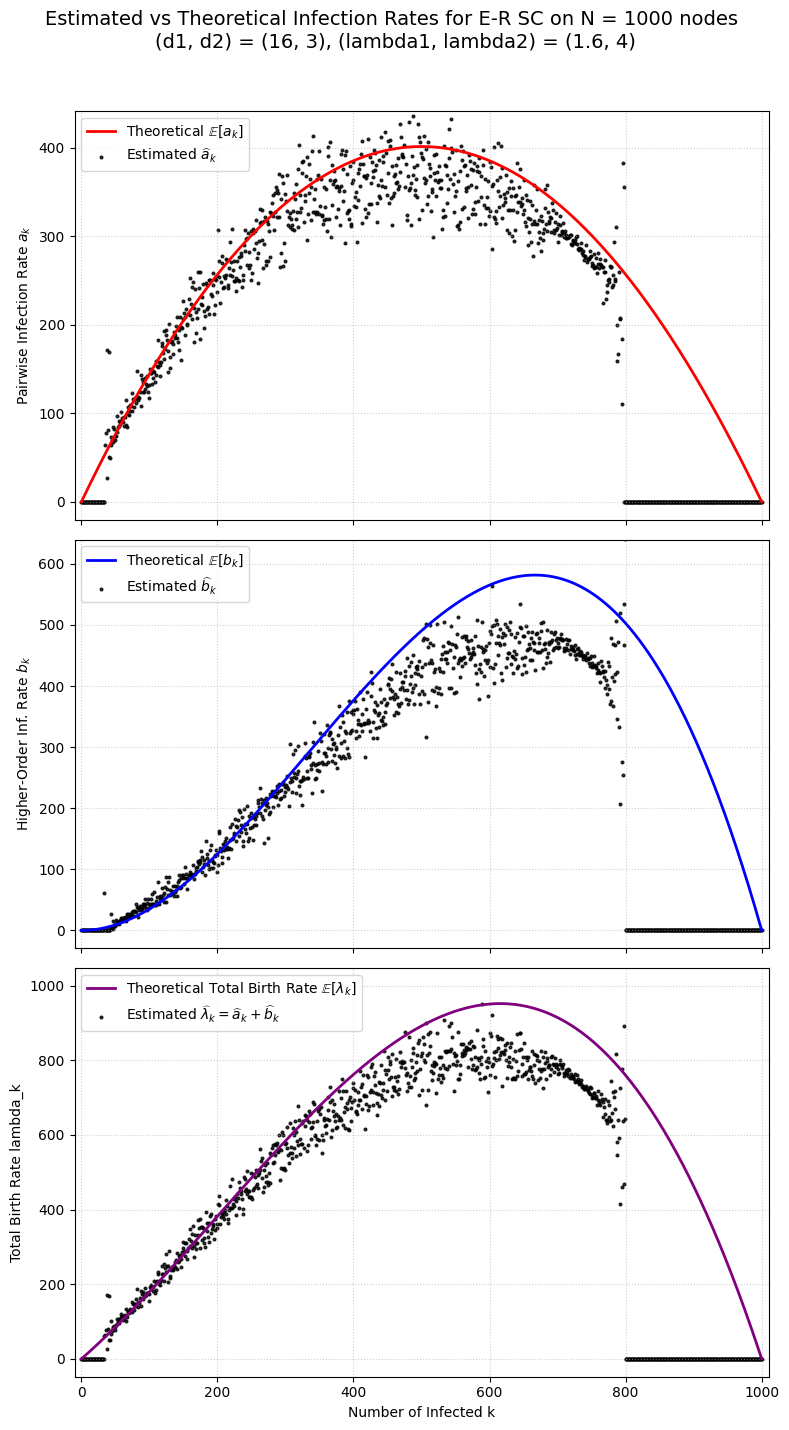

In [38]:
ak_hat_point_estimates = estimates["a_k_hat"]
bk_hat_point_estimates = estimates["b_k_hat"]
lambda_k_hat_point_estimates = estimates["lambda_k_hat"]

plot_valid_k_idx = ~np.isnan(ak_hat_point_estimates)

# theoretical (expected) rates for ER-SC
k_values = np.arange(N + 1)
k_choose_2 = np.array([comb(k, 2, exact=True) if k >= 2 else 0 for k in k_values], dtype=float)
a_k_theoretical = beta1 * g.p1_realized * k_values * (N - k_values)
b_k_theoretical = beta2 * g.p2_realized * k_choose_2 * (N - k_values)
total_birth_k_theoretical = a_k_theoretical + b_k_theoretical

fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True)
title = f"Estimated vs Theoretical Infection Rates for E-R SC on N = {N} nodes \n"
title += f"(d1, d2) = ({d1}, {d2}), (lambda1, lambda2) = ({lambda1}, {lambda2})"
fig.suptitle(title, fontsize=14)

# PW rates a_k
axes[0].plot(k_values, a_k_theoretical, color="red", linestyle='-', linewidth=2,
             label=r'Theoretical $\mathbb{E}[a_k]$')
axes[0].scatter(k_values[plot_valid_k_idx], ak_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{a}_k$')
axes[0].set_ylabel("Pairwise Infection Rate $a_k$")
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle=':', alpha=0.6)

min_y_ak = np.nanmin(ak_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_ak_theory = np.nanmax(a_k_theoretical)
axes[0].set_ylim(bottom=min(0, min_y_ak) - 0.05 * max_y_ak_theory,
                 top=max_y_ak_theory * 1.1 if max_y_ak_theory > 0 else 0.1)


# HO rates b_k
axes[1].plot(k_values, b_k_theoretical, color="blue", linestyle='-', linewidth=2,
             label=r'Theoretical $\mathbb{E}[b_k]$')
axes[1].scatter(k_values[plot_valid_k_idx], bk_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{b}_k$')
axes[1].set_ylabel("Higher-Order Inf. Rate $b_k$")
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle=':', alpha=0.6)
min_y_bk = np.nanmin(bk_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_bk_theory = np.nanmax(b_k_theoretical)
axes[1].set_ylim(bottom=min(0, min_y_bk) - 0.05 * max_y_bk_theory,
                 top=max_y_bk_theory * 1.1 if max_y_bk_theory > 0 else 0.1)


# total birth rates lambda_k = a_k + b_k
axes[2].plot(k_values, total_birth_k_theoretical, color="purple", linestyle='-', linewidth=2,
             label=r'Theoretical Total Birth Rate $\mathbb{E}[\lambda_k]$')
axes[2].scatter(k_values[plot_valid_k_idx], lambda_k_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{\lambda}_k = \widehat{a}_k + \widehat{b}_k$')
axes[2].set_ylabel("Total Birth Rate lambda_k")
axes[2].legend(loc='upper left')
axes[2].grid(True, linestyle=':', alpha=0.6)
min_y_lk = np.nanmin(lambda_k_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_lk_theory = np.nanmax(total_birth_k_theoretical)
axes[2].set_ylim(bottom=min(0, min_y_lk) - 0.05 * max_y_lk_theory,
                 top=max_y_lk_theory * 1.1 if max_y_lk_theory > 0 else 0.1)


axes[2].set_xlabel("Number of Infected k")
for ax_item in axes:
    ax_item.set_xlim(left=-N*0.01, right=N*1.01)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig(f"../figures/estimation/{test_name}/supporting_fig_ER_SC_rates.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

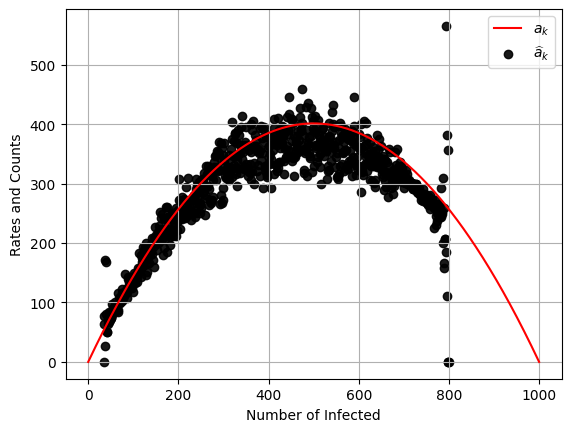

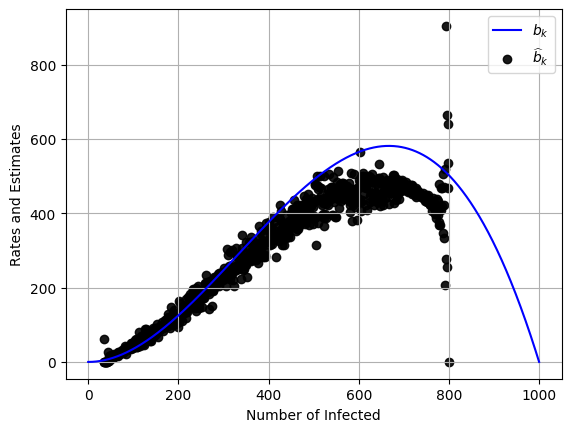

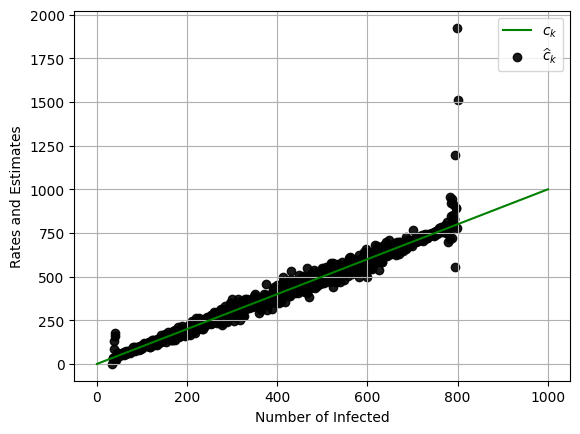

In [39]:
a_k_hat = estimates["a_k_hat"]
b_k_hat = estimates["b_k_hat"]
c_k_hat = estimates["c_k_hat"]

# plot only where T_k was non-zero!
valid_k_idx = estimates["T_k"] > min_Tk_threshold   

# and compare them to theoretical rates
k_values = np.arange(0, N + 1) # number of infected from 0 to N
k_choose_2 = np.array(list(map(lambda k: comb(k, 2, exact=True), k_values)))

# TODO: what are theoretical rates now?
a_k = g.p1_realized * beta1 * k_values * (N - k_values)
b_k = g.p2_realized * beta2 * k_choose_2 * (N - k_values)

# TODO: replace c_k with sum lambda_k = birth_rate_k = a_k + b_k
c_k = mu * k_values

fig = plt.figure()
ax = plt.subplot()

# theoretical ak vs. ak hats 
ax.plot(k_values, a_k, label=r'$a_k$', color="red")
ax.scatter(k_values[valid_k_idx], a_k_hat[valid_k_idx],
        label=r'$\widehat{a}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Counts")
plt.legend()
plt.grid(True)    
plt.savefig(f"../figures/estimation/{test_name}/estimates_ak.pdf", 
            format='pdf', bbox_inches='tight')    
plt.show()

# theoretical bk vs. bk hats
fig = plt.figure()
ax = plt.subplot()
ax.plot(k_values, b_k, label=r'$b_k$', color="blue")
ax.scatter(k_values[valid_k_idx], b_k_hat[valid_k_idx],
        label=r'$\widehat{b}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Estimates")
plt.legend()
plt.grid(True)    
plt.savefig(f"../figures/estimation/{test_name}/estimates_bk.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

# theoretical ck vs. ck hats (as a test only)
fig = plt.figure()
ax = plt.subplot()
ax.plot(k_values, c_k, label=r'$c_k$', color="green")
ax.scatter(k_values[valid_k_idx], c_k_hat[valid_k_idx],
        label=r'$\widehat{c}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Estimates")
plt.legend()
plt.grid(True)
plt.savefig(f"../figures/estimation/{test_name}/estimates_ck.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

## Solve KEs using the estimates

In [40]:
## --- Solve KEs using the estimates and compare ---
# --- Model 2 ---
ode_system_complete = list_all_ODEs_using_estimates(g, a_k_hat, b_k_hat, mu)

def f_ode(t, p):
    return ode_system_complete(t, p)


all_states = list(range(N + 1))
M = len(all_states)
p0 = np.zeros(M)
i_set0 = all_states.index(I0)
p0[i_set0] = 1.0 # all other states have prob 0 at time 0

sol_hat = solve_ivp(f_ode, 
                    t_span, 
                    p0, 
                    t_eval=t_eval,
                    method="LSODA")

expected_values_hat = calculate_expected_values(sol_hat)

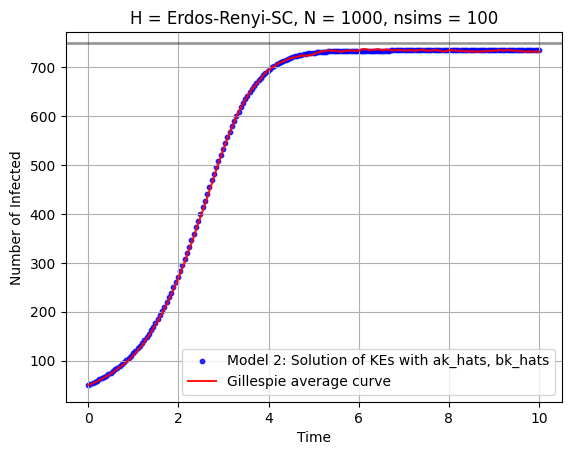

In [41]:
plt.figure()

# plt.plot(sol.t, expected_values_hat, color="b", label="Model 2: Solution of KEs with ak_hats, bk_hats")
plt.scatter(sol_hat.t, expected_values_hat, color="b", s=10, alpha=.8, label="Model 2: Solution of KEs with ak_hats, bk_hats")

plt.plot(times, avg_curve, 'red', label="Gillespie average curve", alpha=0.9)

plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.legend()
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, nsims = {nsims}")
plt.savefig(f"../figures/estimation/{test_name}/solutions-comparison.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()